In [1]:
import heeps
from heeps.util.coord import disk_coord, mas2rms
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_offsets(name, rstar, nr=4):
    offsets = disk_coord(rstar, nr=4)
    print('noffsets = %s'%len(offsets))
    scatter(offsets[:,0],offsets[:,1])
    circ = Circle((0,0),rstar,linestyle=':',color='k',Fill=False)
    ax = gca()
    ax.add_artist(circ)
    ax.axis('equal')
    xlabel('x (mas)')
    ylabel('y (mas)')
    title('R = %s mas (%s) - %s pts'%(rstar,name,len(offsets)))
    savefig('offsets_%s_mas_%s_pts.png'%(rstar,len(offsets)))
    return offsets

# Point source

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, beam_ratio=0.2568
   ravc_calc=False, ravc_t=0.7903, ravc_r=0.6033
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Load pupil from 'ELT_fullM1.fits'
Create on-axis PSF
   apply ring apodizer: ravc_t=0.7903, ravc_r=0.6033
   apply vortex phase mask
   apply lyot stop from 'ls_ravc_circ_285.fits'
   extract PSF on the detector: ndet=403
I_psf = 0.000794152372665202


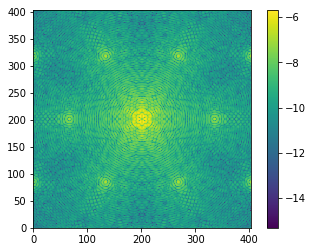

In [3]:
conf = dict(
    dir_current = '$HOME/INSTRUMENTS/METIS/heeps_analysis',
    band = 'L',
    mode = 'RAVC',
    file_pupil = 'pupils/ELT_fullM1.fits',
    file_lyot_stop = 'pupils/ls_ravc_circ_285.fits',
    ravc_calc = False,
    fp_offsets = None,
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=True, verbose=True, **conf)
imshow(np.log10(psf), origin=True); colorbar()
print('I_psf = %s'%np.sum(psf))

# pi1 Gru, r = 9.18 mas

noffsets = 39
Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   ravc_calc=False, ravc_t=0.7903, ravc_r=0.6033
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Load pupil from 'ELT_fullM1.fits'
Create on-axis PSF
   apply ring apodizer: ravc_t=0.7903, ravc_r=0.6033


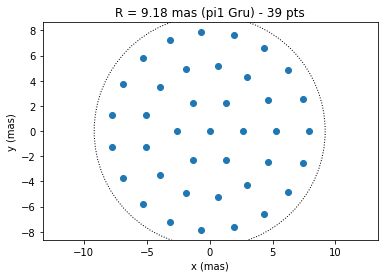

In [4]:
conf.update(
    fp_offsets = mas2rms(get_offsets('pi1 Gru', 9.18), conf['pupil_img_size']),
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=True, verbose=True, **conf)

0.04284105581246214

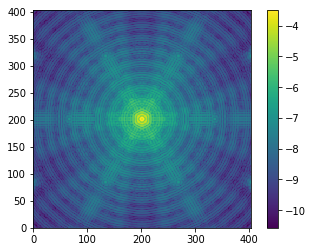

In [5]:
imshow(np.log10(psf), origin=True); colorbar()
np.sum(psf)

# alpha Cen, r = 4.26 mas

noffsets = 39
Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   ravc_calc=False, ravc_t=0.7903, ravc_r=0.6033
   npupil=285, pscale=5.47 mas, lam=3.8112E-06 m
   hfov=1.1 arcsec (-> ndet=403, 51.74 lam/D)

Load pupil from 'ELT_fullM1.fits'
Create on-axis PSF
   apply ring apodizer: ravc_t=0.7903, ravc_r=0.6033


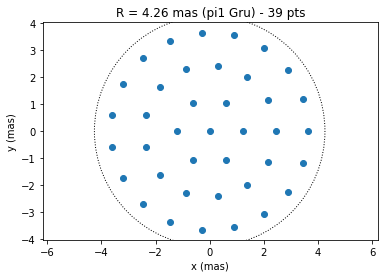

In [6]:
conf.update(
    fp_offsets = mas2rms(get_offsets('pi1 Gru', 4.26), conf['pupil_img_size']),
)
conf = heeps.config.read_config(verbose=False, **conf)
conf = heeps.config.update_config(saveconf=True, verbose=True, **conf) 
wf = heeps.pupil.pupil(savefits=True, verbose=True, **conf)
psf = heeps.wavefront.propagate_one(wf, onaxis=True, savefits=True, verbose=True, **conf)

0.011014176852724315

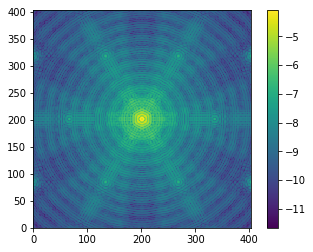

In [7]:
imshow(np.log10(psf), origin=True); colorbar()
np.sum(psf)